# 2020 Top 50 Spotify Tracks Processing with Numpy and Pandas
## About the Dataset
### context
Top 50 most streamed tracks on Spotify in 2020. This dataset has various variables regarding these songs.
### content
50 songs and 16 features

In [61]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
from typing import List

In [45]:
def load_data():
    '''Loads spotify top 50 tracks '''
    
    return pd.read_csv("Data/spotifytoptracks.csv", index_col = 0)

In [47]:
#loading data
spotify_top_tracks = load_data()
spotify_top_tracks.head()

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


### Cleaning Data
<ul>
    <li>Handling Missing Values</li>
    <li>Removing duplicate features and samples</li>
    <li>Treating outliers</li>
</ul>
    



In [46]:
#Handle misssing values
spotify_top_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            50 non-null     object 
 1   album             50 non-null     object 
 2   track_name        50 non-null     object 
 3   track_id          50 non-null     object 
 4   energy            50 non-null     float64
 5   danceability      50 non-null     float64
 6   key               50 non-null     int64  
 7   loudness          50 non-null     float64
 8   acousticness      50 non-null     float64
 9   speechiness       50 non-null     float64
 10  instrumentalness  50 non-null     float64
 11  liveness          50 non-null     float64
 12  valence           50 non-null     float64
 13  tempo             50 non-null     float64
 14  duration_ms       50 non-null     int64  
 15  genre             50 non-null     object 
dtypes: float64(9), int64(2), object(5)
memory usag

The above output shows there are 50 observations of 16 variables. <br>
All the variables have 50 records, indicating there's no missing value in the data. 

In [48]:
#remove duplicate features and samples
spotify_top_tracks.duplicated().sum()

0

The above output indicates that, the data does not contain duplicated records

### Treating outliers
Outliers are measure that significantly differ from other data points. <br>
For this method the following techniques are used to detect outliers

<ol>
    <li>Interquartile Range(IQR)</li>
    <li>Measure of Skewness</li>
    <li>visualization with Box Plot</li>
    <li>visualization with Histogram</li>
</ol>


#### Interquartile Range (IQR)
IQR is a measure of statistical dispersion. <br>
$$ IQR = Q3-Q1 $$ 
Where Q1, and Q3 represents 25th and 75th percentile respectively <br>
A data point <b><i>X</i></b> is outlier if $$ (X < (Q1 - 1.5 * IQR))  or  (X > Q3 + (1.5 * IQR)) $$


In [49]:
#determine IQR
Q1 = spotify_top_tracks.quantile(0.25)
Q3 = spotify_top_tracks.quantile(0.75)
IQR = Q3 - Q1
IQR

energy                  0.235750
danceability            0.122000
key                     6.750000
loudness                3.267000
acousticness            0.245950
speechiness             0.107175
instrumentalness        0.000020
liveness                0.177300
valence                 0.292250
tempo                  32.759750
duration_ms         39218.500000
dtype: float64

In [50]:
# find a data point that falls in range of outlier (those data's will be represented as True)
outliers = ((spotify_top_tracks < (Q1 - 1.5 * IQR)) |(spotify_top_tracks > (Q3 + 1.5 * IQR)))
outliers[outliers == True].count()

/tmp/ipykernel_25147/2543664909.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((spotify_top_tracks < (Q1 - 1.5 * IQR)) |(spotify_top_tracks > (Q3 + 1.5 * IQR)))


acousticness         7
album                0
artist               0
danceability         3
duration_ms          2
energy               0
genre                0
instrumentalness    12
key                  0
liveness             3
loudness             1
speechiness          6
tempo                0
track_id             0
track_name           0
valence              0
dtype: int64

IQR outlier analysis shows that,column acousticness,danceability, duration_ms, instrumentalness, liveness, loudness, and speechiness contians a data point that are outliers. 

#### Measure of Skewness
Skewness explains the extent to which the data is normally distributed. <br>
Ideally, the skewness value should be between -1 and +1, and any major deviation from this range indicates the presence of extreme values. 

In [51]:
#select columns whose data types are float64 and int64
res = spotify_top_tracks.select_dtypes(include=['int64', 'float64']).skew()
left_skewed = res.where(res < -1).dropna().index
right_skewed = res.where(res > 1).dropna().index
print(left_skewed)
print(right_skewed)

Index(['loudness'], dtype='object')
Index(['acousticness', 'speechiness', 'instrumentalness', 'liveness',
       'duration_ms'],
      dtype='object')


Left skew occurs when there's a measure that's significantly less than other data points in the cluster.<br>
Right skew occurs when there's a measure that's significantly greater than other data points in the cluster.

##### Visualizing outliers using Boxplot
Boxplot is a method for graphically depicting groups of numerical data through their quartiles.<br>
Boxplot also has a vertical line that indicates first, and third quartile. If there's a datapoint that does not lie in between the start and end of this vertical line, that indicates an existence of outliers. This outliers is usually depicted using small circle 

energy


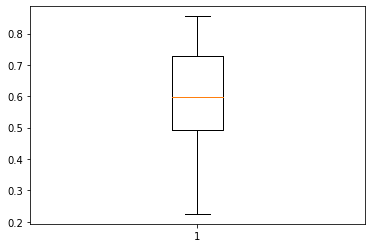

danceability


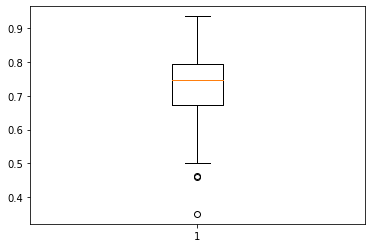

key


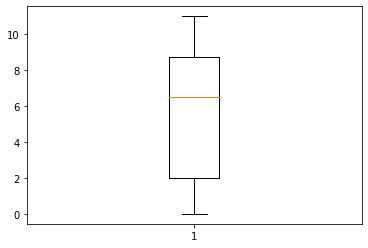

loudness


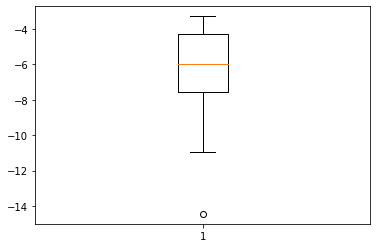

acousticness


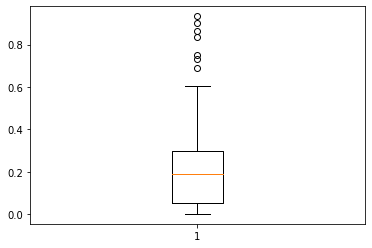

speechiness


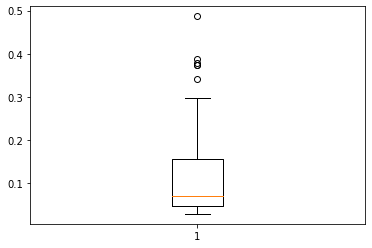

instrumentalness


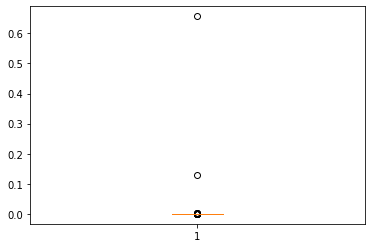

liveness


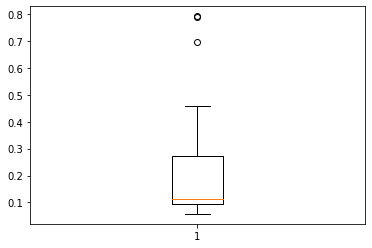

valence


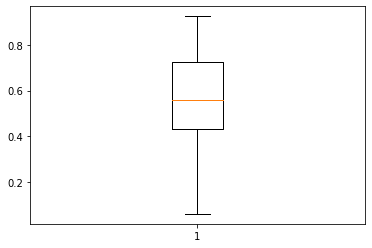

tempo


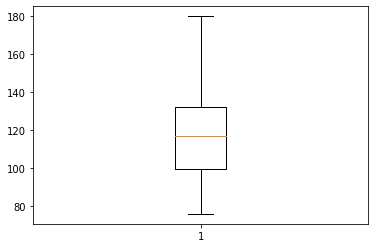

duration_ms


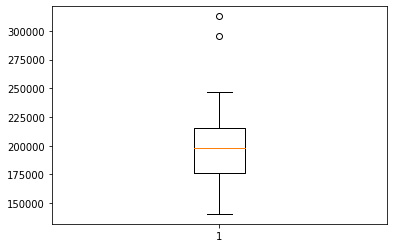

In [54]:
for cols in spotify_top_tracks.select_dtypes(include=['int64', 'float64']).columns:
    print(cols)    
    plt.boxplot(spotify_top_tracks[cols])
    plt.show()

The above boxplot graph shows that the following feature has an outlier datapoint in their measurement.
<ol>
    <li>danceability</li> 
    <li>loudness</li>
    <li>acousticness</li>
    <li>speechiness</li>
    <li>instrumentalness</li>
    <li>liveness</li>
    <li>duration_ms</li>
 </ol>
 This finding confirms with both above methods of finding outliers

#### Visualizing outliers using Histogram
Histogram can also be helpful when finding outliers. Outliers can be easily detected using Histogram. <br>
In Histogram outliers are datapoints that is separetely exist either to the left or right of normal datapoints.

In [51]:
for cols in spotify_top_tracks.select_dtypes(include=['int64', 'float64']).columns:
    print(cols)
    spotify_top_tracks[cols].hist()

### Exploratory Data Analysis
#### Number of Observations and features

In [55]:
observation_no, features_no = spotify_top_tracks.shape
print(f'Number of observation is {observation_no}')
print(f'Number of features is {features_no}')

Number of observation is 50
Number of features is 16


The above output shows there are 50 observations of 16 variables. 

#### Identifying Categorical and Numerical Features
Numeric features of a DataFrame can be found by using `_get_numeric_data()` method of pandas. <br> After finding numeric features, then the rest is categorial

In [56]:
numerical_features = spotify_top_tracks._get_numeric_data().columns
print("Numerical Features")
numerical_features

Numerical Features


Index(['energy', 'danceability', 'key', 'loudness', 'acousticness',
       'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [57]:
print("Categorial Features")
set(spotify_top_tracks) - set(numerical_features)

Categorial Features


{'album', 'artist', 'genre', 'track_id', 'track_name'}

#### Artists with more than one popular track and their tracks
`Counter()` method can be used to determine number of tracks each artists have in top 50. <br>

In [58]:
counter = Counter(spotify_top_tracks['artist'])
popular_artist = [name for name in counter if counter[name] > 1]        # artist with more than one popular track
spotify_top_tracks.query("artist in @popular_artist")[['artist', 'track_name']].sort_values('artist')

,artist,track_name
26,Billie Eilish,bad guy
44,Billie Eilish,lovely (with Khalid)
24,Billie Eilish,everything i wanted
31,Dua Lipa,Break My Heart
48,Dua Lipa,Physical
4,Dua Lipa,Don't Start Now
21,Harry Styles,Adore You
6,Harry Styles,Watermelon Sugar
14,Justin Bieber,Intentions (feat. Quavo)
30,Justin Bieber,Yummy


#### Total Number of artists who have their songs in the top 50

In [59]:
spotify_top_tracks['artist'].unique().size

40

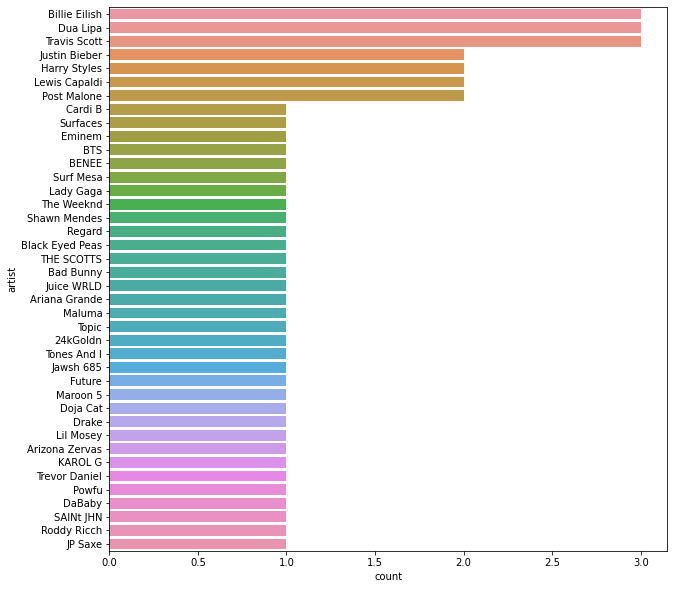

In [62]:
plt.figure(figsize=(10,10))
sns.countplot(y='artist', data=spotify_top_tracks, order=spotify_top_tracks["artist"].value_counts().index)
plt.show()

#### Most popular artist

In [103]:
#most popular artist
spotify_top_tracks['artist'].mode()

0    Billie Eilish
1         Dua Lipa
2     Travis Scott
Name: artist, dtype: object

#### Total Number of Albums whose songs are in the top 50

In [63]:
spotify_top_tracks['album'].unique().size

45

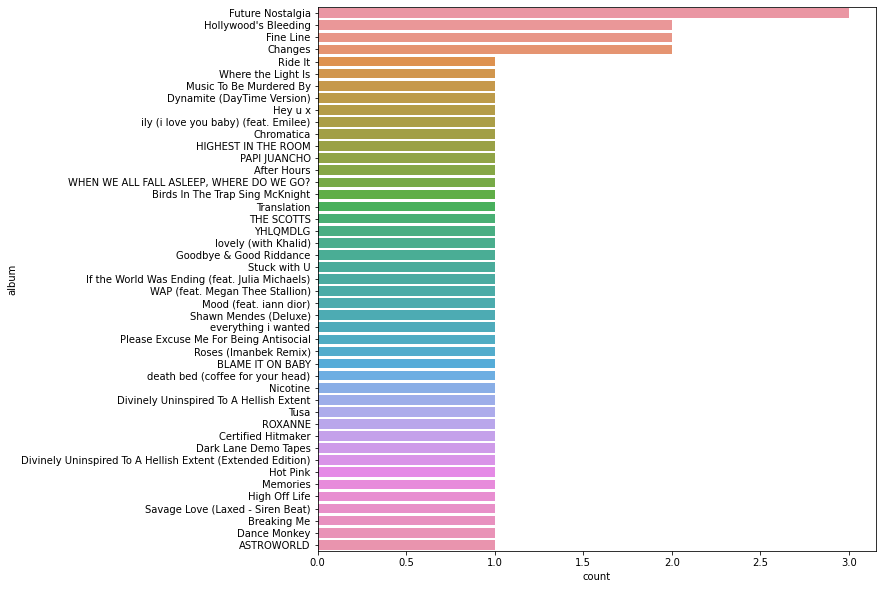

In [65]:
plt.figure(figsize=(10,10))
sns.countplot(y='album', data=spotify_top_tracks, order=spotify_top_tracks["album"].value_counts().index)
plt.show()

#### Albums with more than one popular track

In [64]:
counter = Counter(spotify_top_tracks['album'])
popular_album = [album for album in counter if counter[album] > 1]        # albums with more than one popular track
spotify_top_tracks.query("album in @popular_album")[['album', 'track_name']].sort_values('album')

,album,track_name
14,Changes,Intentions (feat. Quavo)
30,Changes,Yummy
6,Fine Line,Watermelon Sugar
21,Fine Line,Adore You
4,Future Nostalgia,Don't Start Now
31,Future Nostalgia,Break My Heart
48,Future Nostalgia,Physical
12,Hollywood's Bleeding,Circles
37,Hollywood's Bleeding,Sunflower - Spider-Man: Into the Spider-Verse


#### Tracks whose danceability score is above 0.7

In [66]:
#danceability greater than 0.7
spotify_top_tracks.query("danceability > 0.7")[['track_name', 'danceability']]

,track_name,danceability
1,Dance Monkey,0.825
2,The Box,0.896
3,Roses - Imanbek Remix,0.785
4,Don't Start Now,0.793
5,ROCKSTAR (feat. Roddy Ricch),0.746
7,death bed (coffee for your head),0.726
8,Falling,0.784
10,Tusa,0.803
13,Blueberry Faygo,0.774
14,Intentions (feat. Quavo),0.806


#### Tracks whose danceability score is below 0.4

In [67]:
#danceability less than 0.7
spotify_top_tracks.query("danceability < 0.4")[['track_name', 'danceability']]

,track_name,danceability
44,lovely (with Khalid),0.351


#### Tracks whose loudness score is  above -5

In [68]:
#loudness score above -5
spotify_top_tracks.query("loudness > -5")[['track_name', 'loudness']]

,track_name,loudness
4,Don't Start Now,-4.521
6,Watermelon Sugar,-4.209
10,Tusa,-3.280
12,Circles,-3.497
16,Before You Go,-4.858
17,Say So,-4.577
21,Adore You,-3.675
23,Mood (feat. iann dior),-3.558
31,Break My Heart,-3.434
32,Dynamite,-4.410


#### Tracks whose loudness score is below -8

In [90]:
spotify_top_tracks.query("loudness < -8")[['track_name', 'loudness']]

,track_name,loudness
7,death bed (coffee for your head),-8.765
8,Falling,-8.756
15,Toosie Slide,-8.820
20,Savage Love (Laxed - Siren Beat),-8.520
24,everything i wanted,-14.454
26,bad guy,-10.965
36,HIGHEST IN THE ROOM,-8.764
44,lovely (with Khalid),-10.109
47,If the World Was Ending - feat. Julia Michaels,-10.086


#### Longest Track

In [71]:
spotify_top_tracks.loc[spotify_top_tracks['duration_ms'].idxmax()]

artist                        Travis Scott
album                           ASTROWORLD
track_name                      SICKO MODE
track_id            2xLMifQCjDGFmkHkpNLD9h
energy                                0.73
danceability                         0.834
key                                      8
loudness                            -3.714
acousticness                       0.00513
speechiness                          0.222
instrumentalness                       0.0
liveness                             0.124
valence                              0.446
tempo                              155.008
duration_ms                         312820
genre                          Hip-Hop/Rap
Name: 49, dtype: object

#### Shortest Track

In [94]:
spotify_top_tracks.loc[spotify_top_tracks['duration_ms'].idxmin()]

artist                            24kGoldn
album               Mood (feat. iann dior)
track_name          Mood (feat. iann dior)
track_id            3tjFYV6RSFtuktYl3ZtYcq
energy                               0.722
danceability                           0.7
key                                      7
loudness                            -3.558
acousticness                         0.221
speechiness                         0.0369
instrumentalness                       0.0
liveness                             0.272
valence                              0.756
tempo                               90.989
duration_ms                         140526
genre                              Pop rap
Name: 23, dtype: object

#### Popular genre

In [95]:
#most popular genre
spotify_top_tracks['genre'].mode()

0    Pop
Name: genre, dtype: object

#### Total Number of genres represented in top 50

In [96]:
spotify_top_tracks['genre'].unique().size

16

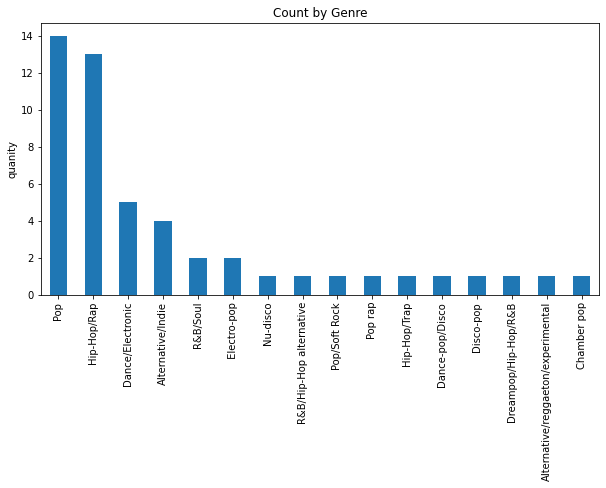

In [116]:
plt.figure(figsize=(10,5))
spotify_top_tracks['genre'].value_counts().plot.bar()
plt.title('Count by Genre')
plt.ylabel('quanity')
plt.show()

### Correlation of Features

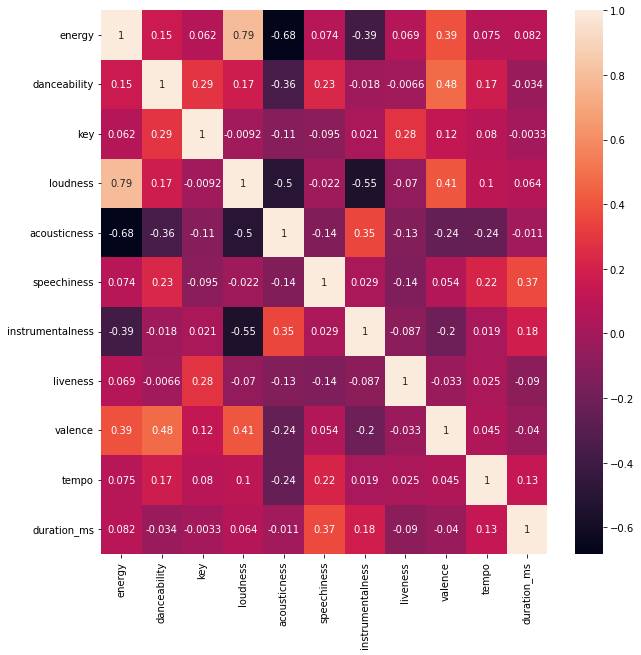

In [111]:
# heatmap of the correlation
plt.figure(figsize=(10,10))
correlation_matrix = spotify_top_tracks.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [119]:
strong_positive_correlation_map = defaultdict(set)
strong_negative_correlation_map = defaultdict(set)
no_correlation_feature = defaultdict(set)

for row in correlation_matrix:
    for col in correlation_matrix:
        if row != col and abs(correlation_matrix.loc[row, col]) > 0.5:
            if correlation_matrix.loc[row, col] > 0: strong_positive_correlation_map[row].add(col)
            else:strong_negative_correlation_map[row].add(col)
        if correlation_matrix.loc[row, col]==0:no_correlation_feature[row].add(col)

#### Strongly positvely correlated features

In [120]:
strong_positive_correlation_map

defaultdict(set, {'energy': {'loudness'}, 'loudness': {'energy'}})

#### Strongly negatively correlated features

In [121]:
strong_negative_correlation_mapno_correlation_feature

defaultdict(set,
            {'energy': {'acousticness'},
             'loudness': {'instrumentalness'},
             'acousticness': {'energy'},
             'instrumentalness': {'loudness'}})

#### Features that are not correlated

In [122]:
no_correlation_feature

defaultdict(set, {})

##### Comparision of  score  between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres

In [74]:
#list of selected genres as index
index = ['Pop', 'Hip-Hop/Rap', 'Alternative/Indie', 'Dance/Electronic']

#list of cols to when comparing
cols = spotify_top_tracks.describe().index

In [75]:
#capture a dataframe for each type of genre specified
df_pop = spotify_top_tracks.query("genre == 'Pop'")
df_hiphop = spotify_top_tracks.query("genre == 'Hip-Hop/Rap'")
df_alt_indie = spotify_top_tracks.query("genre == 'Alternative/Indie'")
df_dance_elec = spotify_top_tracks.query("genre == 'Dance/Electronic'")

In [76]:
def get_score(feature:str)->List:
    '''Sorts a feature in a given DataFrame'''
    return [
                df_pop[feature].sort_values(), \
                df_hiphop[feature].sort_values(), \
                df_alt_indie[feature].sort_values(), \
                df_dance_elec[feature].sort_values() 
           ]

In [77]:
def get_describe_info(feature:str):
    '''Computes count, mean, std, min and max, and percentile of a dataframe for a given feature'''
    return [
                df_pop[feature].describe().tolist(), \
                df_hiphop[feature].describe().tolist(), \
                df_alt_indie[feature].describe().tolist(), \
                df_dance_elec[feature].describe().tolist()
           ]

In [78]:
def draw_graph(genres:List, x_label:str, y_label:str):
    '''Draw the figure'''
    
    plt.figure(figsize=(16, 8), dpi=80)
    plt.plot(genres[0], np.arange(genres[0].count()), label = 'Pop')
    plt.plot(genres[1], np.arange(genres[1].count()), label = 'Hip-Hop/Rap')
    plt.plot(genres[2], np.arange(genres[2].count()), label = 'Alternative/Indie')
    plt.plot(genres[3], np.arange(genres[3].count()), label = 'Dance/Electronic')
    plt.ylabel(x_label)
    plt.xlabel(y_label)
    plt.legend()
    plt.show()

##### Compare danceability score

In [79]:
#describe danceability score for selected genres
data = get_describe_info('danceability')
pd.DataFrame(data, columns = cols, index = index)

,count,mean,std,min,25%,50%,75%,max
Pop,14.0,0.677571,0.109853,0.464,0.61575,0.690,0.76275,0.806
Hip-Hop/Rap,13.0,0.765538,0.085470,0.598,0.72600,0.774,0.83000,0.896
Alternative/Indie,4.0,0.661750,0.211107,0.459,0.49050,0.663,0.83425,0.862
Dance/Electronic,5.0,0.755000,0.094744,0.647,0.67400,0.785,0.78900,0.880


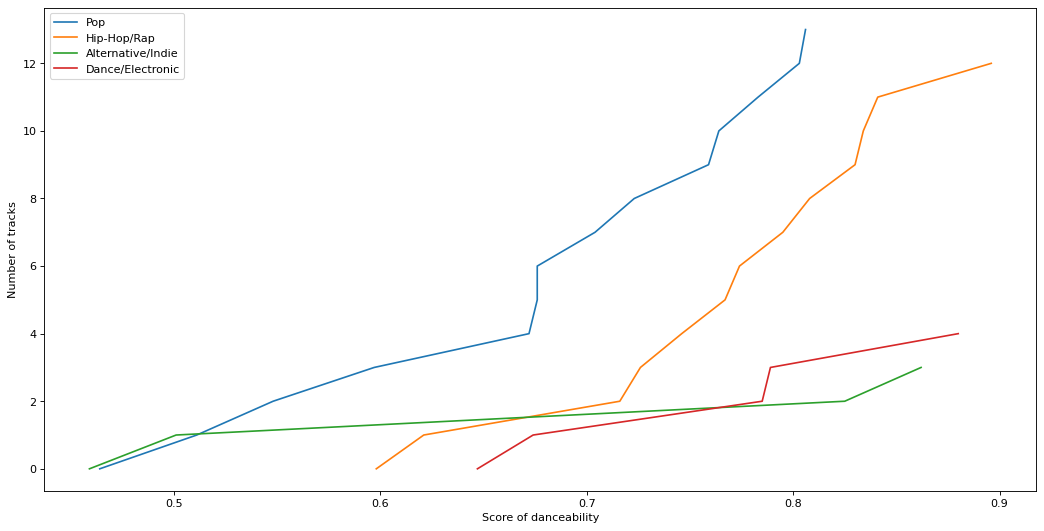

In [80]:
#take danceability score column and sort the values
result = get_score('danceability')
draw_graph(result, 'Number of tracks', 'Score of danceability')

##### Compare loudness score

In [81]:
#describe loudness score for selected genres
data = get_describe_info('loudness')
pd.DataFrame(data, columns = cols, index  = index)

,count,mean,std,min,25%,50%,75%,max
Pop,14.0,-6.460357,3.014281,-14.454,-7.17875,-6.6445,-3.87525,-3.280
Hip-Hop/Rap,13.0,-6.917846,1.891808,-8.820,-8.52000,-7.6480,-5.61600,-3.370
Alternative/Indie,4.0,-5.421000,0.774502,-6.401,-5.85950,-5.2685,-4.83000,-4.746
Dance/Electronic,5.0,-5.338000,1.479047,-7.567,-5.65200,-5.4570,-4.25800,-3.756


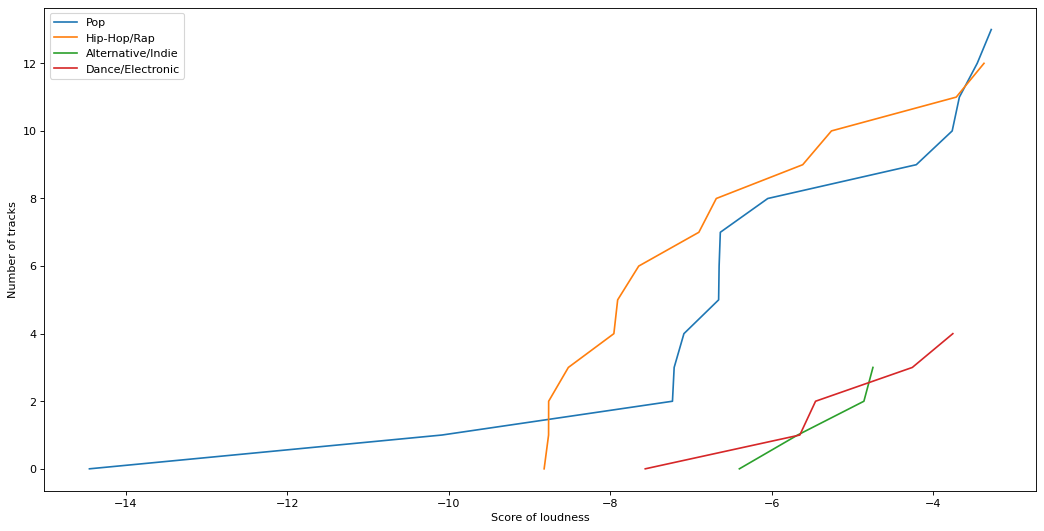

In [82]:
#take loudness feature and sort the values
result = get_score('loudness')
draw_graph(result, 'Number of tracks', 'Score of loudness')

##### Compare acousticness score

In [43]:
#describe acousticness score for selected genres
data = get_describe_info('acousticness')
pd.DataFrame(data, columns = cols, index = index)

,count,mean,std,min,25%,50%,75%,max
Pop,14.0,0.323843,0.318142,0.02100,0.05990,0.2590,0.34800,0.902
Hip-Hop/Rap,13.0,0.188741,0.186396,0.00513,0.06700,0.1450,0.23400,0.731
Alternative/Indie,4.0,0.583500,0.204086,0.29100,0.52575,0.6460,0.70375,0.751
Dance/Electronic,5.0,0.099440,0.095828,0.01370,0.01490,0.0686,0.17700,0.223


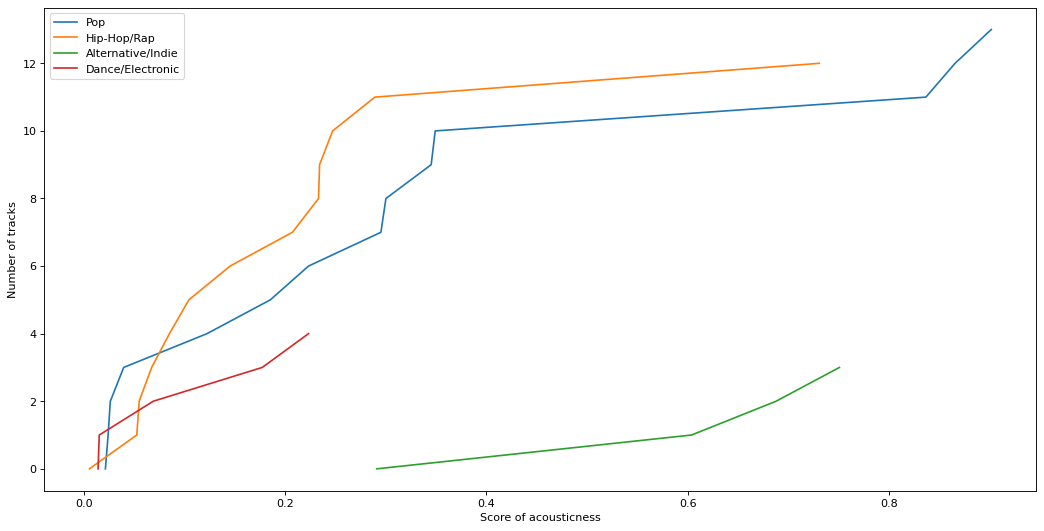

In [33]:
#take acousticness feature score and sort the values
result = get_score('acousticness')
draw_graph(result, 'Number of tracks', 'Score of acousticness')